# TP AI CSP: 

In [19]:
import time
import seaborn as sns
import matplotlib.pyplot as plt

## Sans Heuristique :

In [41]:
class SudokuCSP:
    def __init__(self, puzzle):
        self.grid = puzzle
        self.choices_explored = 0
        self.start_time = time.time() 
        sns.set(style="whitegrid")

    def is_valid(self, row, col, num):
        for i in range(9):
            if self.grid[row][i] == num or self.grid[i][col] == num:
                return False

        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if self.grid[start_row + i][start_col + j] == num:
                    return False

        return True

    def find_empty_location(self):
        for i in range(9):
            for j in range(9):
                if self.grid[i][j] == 0:
                    return i, j
        return None

    def solve(self):
        empty_location = self.find_empty_location()

        if not empty_location:
            elapsed_time = time.time() - self.start_time
            print(f"Sudoku solved in {elapsed_time:.6f} seconds.")
            print(f"Number of choices explored: {self.choices_explored}")
            return True

        row, col = empty_location

        for num in range(1, 10):
            if self.is_valid(row, col, num):
                self.grid[row][col] = num
                self.choices_explored += 1
                if self.solve():
                    return True
                self.grid[row][col] = 0

        # If no number leads to a solution, backtrack
        return False

    def display(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax = sns.heatmap(self.grid, cmap="YlOrRd", annot=True, cbar=False, linewidths=1, linecolor='black', fmt='g', ax=ax)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        # Draw lines for the 3x3 subgrids
        for i in range(0, 10, 3):
            ax.axhline(i, color='white', lw=5)
            ax.axvline(i, color='white', lw=5)

Sudoku solved in 0.124706 seconds.
Number of choices explored: 4208
Sudoku solved:


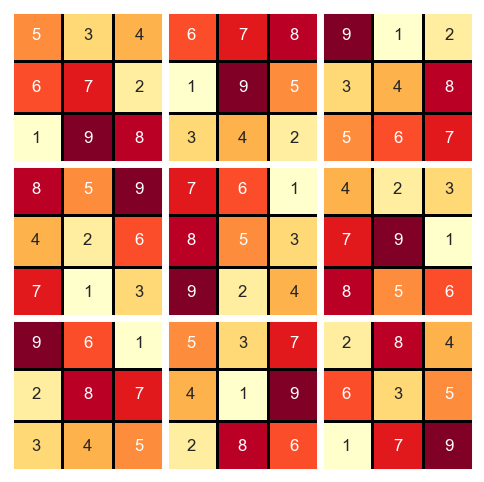

In [42]:
# Example usage:
puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

sudoku_csp = SudokuCSP(puzzle)
if sudoku_csp.solve():
    print("Sudoku solved:")
    sudoku_csp.display()
else:
    print("No solution exists.")


## Avec Heuristique : 

### MRV Heuristic :

In [44]:
class SudokuCSP:
    def __init__(self, puzzle):
        self.grid = puzzle
        self.choices_explored = 0
        self.start_time = time.time() 
        sns.set(style="whitegrid")

    def is_valid(self, row, col, num):
        for i in range(9):
            if self.grid[row][i] == num or self.grid[i][col] == num:
                return False

        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if self.grid[start_row + i][start_col + j] == num:
                    return False

        return True
    
    def count_valid_choices(self, row, col):
        choices = 0
        for num in range(1, 10):
            if self.is_valid(row, col, num):
                choices += 1

        return choices
    
    def find_empty_location(self):
        min_choices = float('inf')
        empty_location = None

        for i in range(9):
            for j in range(9):
                if self.grid[i][j] == 0:
                    choices = self.count_valid_choices(i, j)

                    if choices < min_choices:
                        min_choices = choices
                        empty_location = (i, j)

        return empty_location
    
    def solve(self):
        empty_location = self.find_empty_location()

        if not empty_location:
            elapsed_time = time.time() - self.start_time
            print(f"Sudoku solved in {elapsed_time:.6f} seconds.")
            print(f"Number of choices explored: {self.choices_explored}")
            return True

        row, col = empty_location

        for num in range(1, 10):
            if self.is_valid(row, col, num):
                self.grid[row][col] = num
                self.choices_explored += 1
                
                if self.solve():
                    return True

                self.grid[row][col] = 0
        return False

    def display(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax = sns.heatmap(self.grid, cmap="Pastel1", annot=True, cbar=False, linewidths=1, linecolor='black', fmt='g', ax=ax)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        # Draw lines for the 3x3 subgrids
        for i in range(0, 10, 3):
            ax.axhline(i, color='white', lw=5)
            ax.axvline(i, color='white', lw=5)

        plt.show()

Sudoku solved in 0.018765 seconds.
Number of choices explored: 51
Sudoku solved:


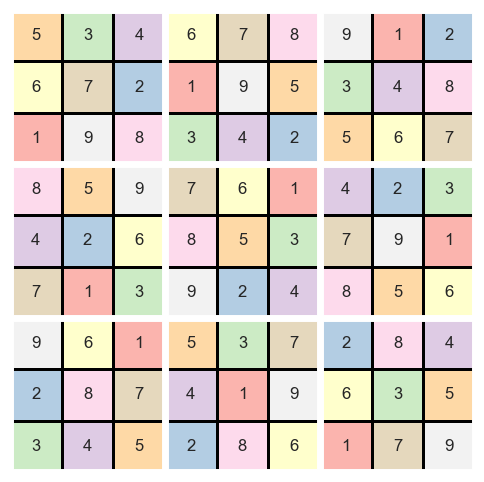

In [45]:
# Example usage:
puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

sudoku_csp = SudokuCSP(puzzle)
if sudoku_csp.solve():
    print("Sudoku solved:")
    sudoku_csp.display()
else:
    print("No solution exists.")
